In [27]:
!pip install pandas
!pip install scikit-learn
!pip install imbalanced-learn
!pip install numpy
!pip install seaborn
import pandas as pd
import numpy as np
from collections import Counter
from itertools import islice
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('/home/amber/opcodes_output.csv')
print(df.head())

                                             Opcodes    APT
0  "PUSH, MOV, PUSH, MOV, MOV, CMP, MOV, MOV, JE,...  APT12
1  "MOV, CALL, JMP, PUSH, AND, PUSH, PUSH, PUSH, ...  APT30
2  "ADD, ADD, ADD, ADD, ADD, ADD, ADD, ADD, ADD, ...  APT30
3  "MOV, CALL, JMP, PUSH, PUSH, PUSH, PUSH, MOV, ...  APT30
4  "NOP, NOP, NOP, NOP, NOP, NOP, NOP, NOP, NOP, ...   deep


VISUALIZATION TECHNIQUES USED TO UNDERSTAND THE DATASET........

1. Frequency of the Opcodes...

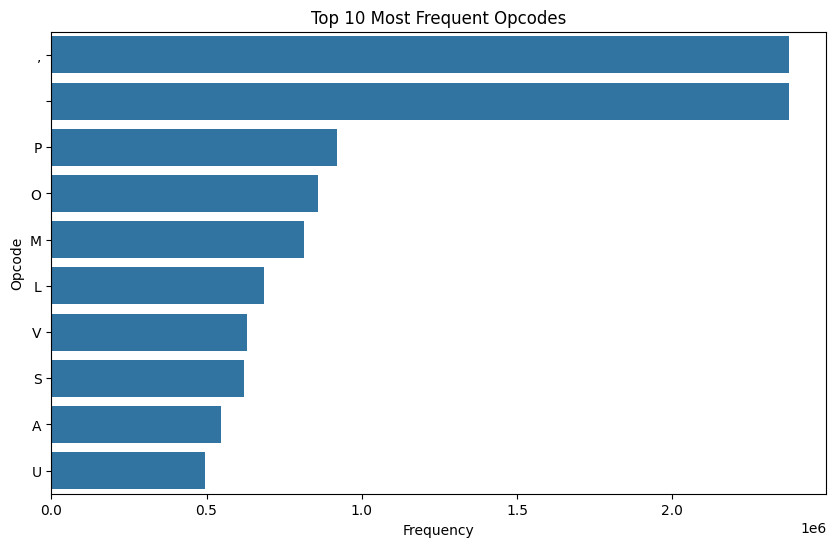

In [4]:
# Flatten the list of opcodes to count their frequency across all rows
all_opcodes = [opcode for sublist in df['Opcodes'] for opcode in sublist]

# Create a frequency distribution of opcodes
opcode_frequency = Counter(all_opcodes)

# Convert to a DataFrame for easy plotting
opcode_freq_df = pd.DataFrame(opcode_frequency.items(), columns=['Opcode', 'Frequency'])

# Sort by frequency
opcode_freq_df = opcode_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top 10 opcodes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Opcode', data=opcode_freq_df.head(10))
plt.title('Top 10 Most Frequent Opcodes')
plt.xlabel('Frequency')
plt.ylabel('Opcode')
plt.show()

b. Distribution of Unique Opcode Counts....

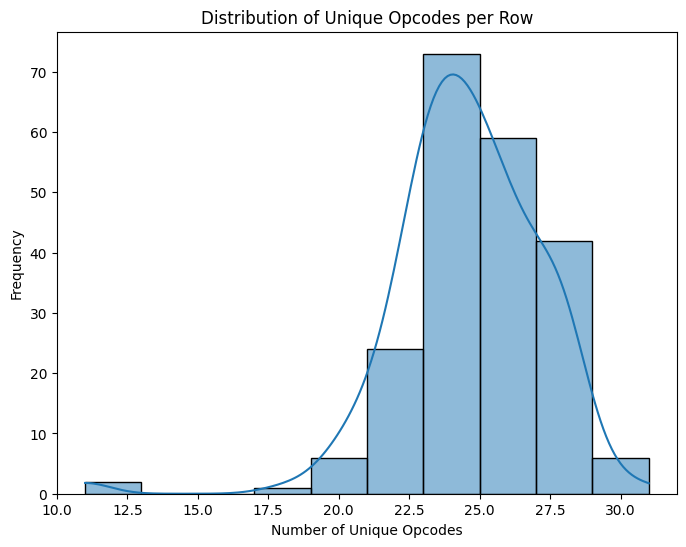

In [6]:
# If 'Opcodes' column contains lists, count unique opcodes per row:
df['UniqueOpcodes'] = df['Opcodes'].apply(lambda x: len(set(x)))

# Now plot the distribution of unique opcodes
plt.figure(figsize=(8, 6))
sns.histplot(df['UniqueOpcodes'], bins=10, kde=True)
plt.title('Distribution of Unique Opcodes per Row')
plt.xlabel('Number of Unique Opcodes')
plt.ylabel('Frequency')
plt.show()

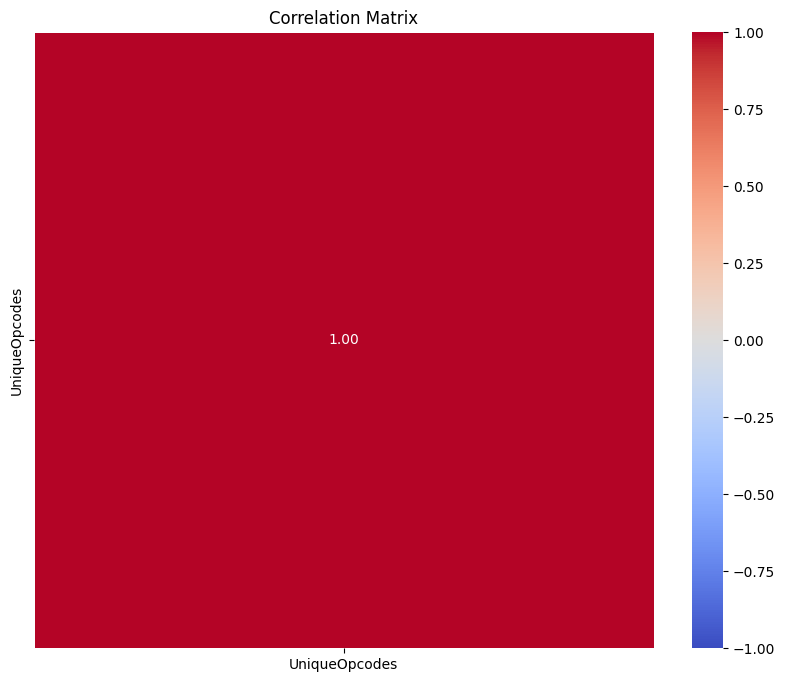

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# ===================== 1-GRAM PROCESSING =====================
unique_1grams = set()
for opcodes in df['Opcodes']:
    unique_1grams.update(op.strip() for op in opcodes.split(', '))

unique_1grams = sorted(unique_1grams)
one_gram_counts_df = pd.DataFrame(0, index=range(len(df)), columns=unique_1grams)

for i, row in df.iterrows():
    opcode_list = [op.strip() for op in row['Opcodes'].split(', ')]
    counts_1gram = Counter(opcode_list)

    for opcode, count in counts_1gram.items():
        one_gram_counts_df.at[i, opcode] = count

x_1gram = one_gram_counts_df.values
print(x_1gram)
y_1gram = df['APT'].values

[[   0    0    0 ...    0 2588    0]
 [   0    0    0 ...    0   25    0]
 [   1    0    0 ...    0    7    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    4    0]
 [   0    0    0 ...    0    1    0]]


In [10]:
# ===================== 2-GRAM PROCESSING =====================
def generate_2grams(sequence):
    """Generate 2-grams from a sequence of opcodes."""
    return ['{'+', '.join(sequence[i:i + 2])+'}' for i in range(len(sequence) - 2 + 1)]

unique_2grams = set()
for opcodes in df['Opcodes']:
    opcode_list = [op.strip() for op in opcodes.split(', ')]
    two_grams = generate_2grams(opcode_list)
    unique_2grams.update(two_grams)
print(unique_2grams)
unique_2grams = sorted(unique_2grams)
two_gram_counts_df = pd.DataFrame(0, index=range(len(df)), columns=unique_2grams)

for i, row in df.iterrows():
    opcode_list = [op.strip() for op in row['Opcodes'].split(', ')]
    two_grams = generate_2grams(opcode_list)
    counts_2gram = Counter(two_grams)

    for two_gram, count in counts_2gram.items():
        two_gram_counts_df.at[i, two_gram] = count

x_2gram = two_gram_counts_df.values

{'{CMP, CMOVA}', '{LEA, WAIT}', '{SETZ, XOR}', '{MOVUPS, MOVSS}', '{MOVSW, IN}', '{PXOR, MOVDQA}', '{TEST, MOVZX}', '{JBE, OUTSW}', '{NOT, POP}', '{LES, XOR}', '{MOV, XADD.LOCK}', '{XCHG, PUSH}', '{CMOVA, MOV}', '{POPF, POP}', '{JNP, JNC}', '{PUSHA, SLDT}', '{JO, STOSW}', '{LEA, MOVDQU}', '{MOV, INC.LOCK}', '{ADD, POPF}', '{JMP, MOVUPS}', '{NEG, MOV}', '{MOVQ, NOP}', '{POP, OUTSB}', '{JNE, PUSH}', '{LEA, RCL}', '{SLDT, ADD}', '{ESC, CALL}', '{TEST, PUSH}', '{PUSH, TEST}', '{CMOVNC, LOOPZ}', '{FMUL, MOV}', '{ENTER, ARPL}', '{INC, RET"}', '{CALLF, STI}', '{ADD, PUSH}', '{CALL, JCXZ}', '{INC, LEA}', '{JGE, LEA}', '{JZ, DEC.LOCK}', '{OUTSB, MOV}', '{CMOVNZ, TEST}', '{POP, WAIT}', '{DAS, CMOVNP}', '{DEC, LODSB}', '{CALL, CALL}', '{LEA, CMP}', '{TEST, JNC}', '{JMP, NEG}', '{XCHG, SUB}', '{RET, POP}', '{MOV, CALL}', '{PUSH, POPFD}', '{OUT, OR}', '{SHORT, PUSH}', '{INC, XCHG}', '{OUT, JO}', '{INTO, ADD}', '{CMPSB, MOVSW}', '{CLC, OUTSB}', '{MOV, COMISD}', '{INT1, XCHG}', '{CWD, AAA}', '{ADC, S

In [11]:
print("1-Gram Feature Matrix (first few rows):")
print(one_gram_counts_df.head())
print("\nShape of x_1gram:", x_1gram.shape)


print("\n2-Gram Feature Matrix (first few rows):")
print(two_gram_counts_df.head())
print("\nShape of x_2gram:", x_2gram.shape)

1-Gram Feature Matrix (first few rows):
   "ADD  "CMP  "DEC  "JMP  "LEA  "MOV  "NOP  "OUTSB  "OUTSW  "PUSH  ...  \
0     0     0     0     0     0     0     0       0       0      1  ...   
1     0     0     0     0     0     1     0       0       0      0  ...   
2     1     0     0     0     0     0     0       0       0      0  ...   
3     0     0     0     0     0     1     0       0       0      0  ...   
4     0     0     0     0     0     0     1       0       0      0  ...   

   VPXOR  VZEROUPPER  WAIT  XADD.LOCK  XCHG  XCHG"  XGETBV  XLAT   XOR  XORPS  
0      0           0    21          0     4      0       0     0  2588      0  
1      0           0     0          0     0      0       0     0    25      0  
2      0           0     1          0     6      0       0     0     7      0  
3      0           0     0          0     0      0       0     0   154      0  
4      0           0     1          0     3      0       0     0  4431      0  

[5 rows x 295 columns]

Shap

In [12]:
x_1gram_df = pd.DataFrame(x_1gram)
x_2gram_df = pd.DataFrame(x_2gram)

In [13]:
# Concatenate along columns (axis=1)
X_combined = pd.concat([x_1gram_df, x_2gram_df], axis=1)

In [14]:
y = df['APT'].values  # Labels

In [15]:
X_combined_df = X_combined.values

FEATURE SCALING AND CLASS IMBALANCE HANDLE BEFORE MODEL TRAINING....

In [23]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined_df)

In [25]:
# Handle Class Imbalance with Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y_1gram)

TRAIN SPLITS , MODEL TRAINING AND EVALUATING RESULTS ON THREE CLASSIFIERS...

1. SVM
2. KNN NEIGHBOURS (N=3)
3. DECISION TREE

In [26]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Models (Including SVM, KNN, and Decision Tree)
models = {
    "SVM (Linear)": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42)
}

# Evaluate Models with Cross-Validation
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model performance on the test set
    print(f"{model_name} - Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

    print("="*80)

# Fine-Tuning - If needed, tune hyperparameters using GridSearchCV for the best model
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best cross-validation score: {grid_search_dt.best_score_:.4f}")

# Evaluate the best Decision Tree model on the test set
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

print("Best Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Best Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dt, zero_division=1))

Evaluating SVM (Linear)...
SVM (Linear) - Cross-Validation Accuracy: 0.8952 ± 0.0132
SVM (Linear) - Test Accuracy: 0.9176
SVM (Linear) - Classification Report:
                precision    recall  f1-score   support

           APT       0.62      1.00      0.76         8
          APT1       1.00      0.91      0.95        11
         APT12       1.00      1.00      1.00         9
         APT17       1.00      1.00      1.00         9
         APT19       0.92      1.00      0.96        12
         APT29       0.86      0.60      0.71        10
         APT30       1.00      1.00      1.00         9
         APT41       1.00      1.00      1.00        14
     Dragonfly       1.00      0.00      0.00         8
     Elderwood       1.00      1.00      1.00         4
       Gallium       1.00      1.00      1.00        11
 Gamaredon.txt       1.00      1.00      1.00        12
      Ke3chang       1.00      1.00      1.00         7
      MenuPass       1.00      1.00      1.00         8

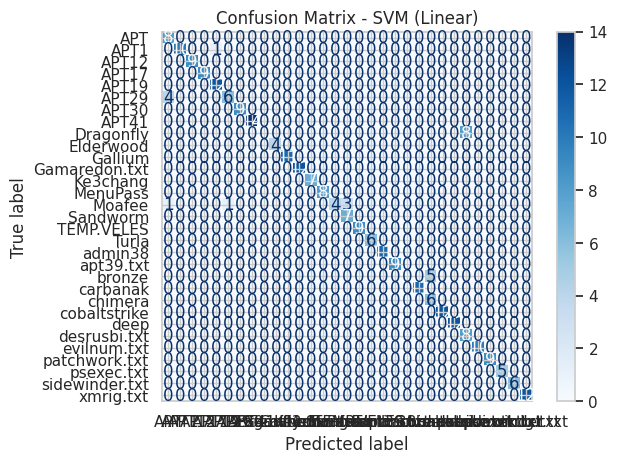

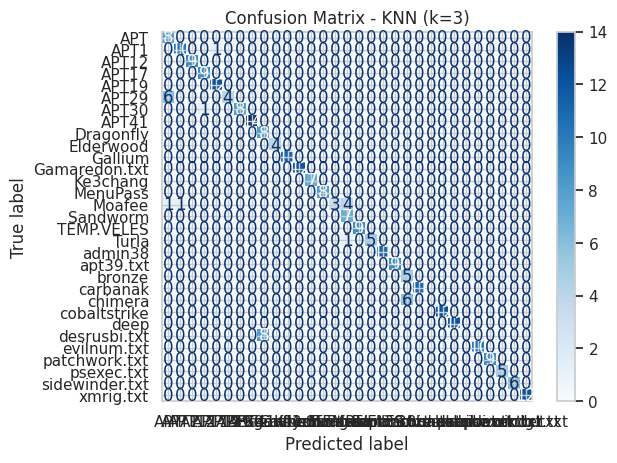

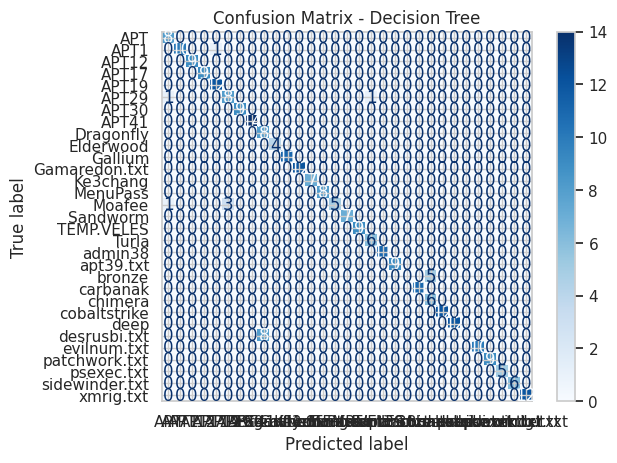

In [28]:
# Set plot style
sns.set(style="whitegrid")

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    cm_display.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Assuming X_train, X_test, y_train, y_test are already defined

# SVM (Linear)
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Plot SVM Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM (Linear)")

# KNN (k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Plot KNN Confusion Matrix
plot_confusion_matrix(y_test, y_pred_knn, "KNN (k=3)")

# Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Plot Decision Tree Confusion Matrix
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")